In [1]:
%pip install librosa
%pip install numpy
%pip install matplotlib
%pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 677.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 791.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 905.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 570.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 653.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 484.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 655.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 440.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 765.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
import sklearn
from IPython.display import Audio
import IPython.display as ipd
import os
import librosa.display
import scipy as sp

In [10]:
BASE_FOLDER = "sounds/4 - ZENITH - Drum One Shots/"
KICK_FILE = "Cymatics - Kick (Wharf).wav"
HAT_FILE = "Cymatics - Open Hat (Projectile).wav"

Audio length: 0.7031292517006803 s
Sample frequency: 44100 Hz
Number of samples: 31008
Number of channels: 2


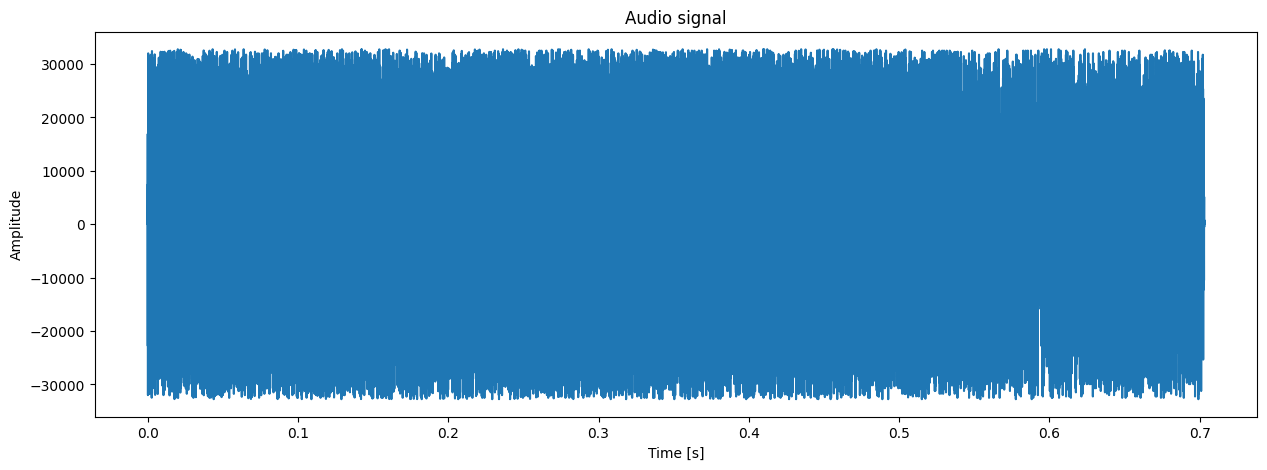

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave

# Open the audio file
obj = wave.open(
    "sounds/4 - ZENITH - Drum One Shots/Cymatics - Open Hat (Projectile).wav", "rb"
)

# Read audio parameters
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
n_channels = obj.getnchannels()
signal_wave = obj.readframes(-1)

# Close the file
obj.close()

# Calculate audio length in seconds
t_audio = n_samples / sample_freq

# Print audio information
print(f"Audio length: {t_audio} s")
print(f"Sample frequency: {sample_freq} Hz")
print(f"Number of samples: {n_samples}")
print(f"Number of channels: {n_channels}")

# Convert signal wave to a NumPy array
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

# Adjust for the number of channels
if n_channels > 1:
    # Reshape signal_array to separate channels
    signal_array = signal_array.reshape(-1, n_channels)
    # Select the first channel (for example)
    signal_array = signal_array[:, 0]

# Generate time array
times = np.linspace(0, t_audio, num=len(signal_array))

# Plot the audio signal
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Audio signal")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def draw_spectrogram(audio_path):
    """
    Draws a spectrogram for the given audio file.

    Parameters:
    - audio_path: str, path to the audio file.

    Returns:
    None, displays a spectrogram.
    """
    # Load the audio sample
    y, sr = librosa.load(audio_path)

    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()

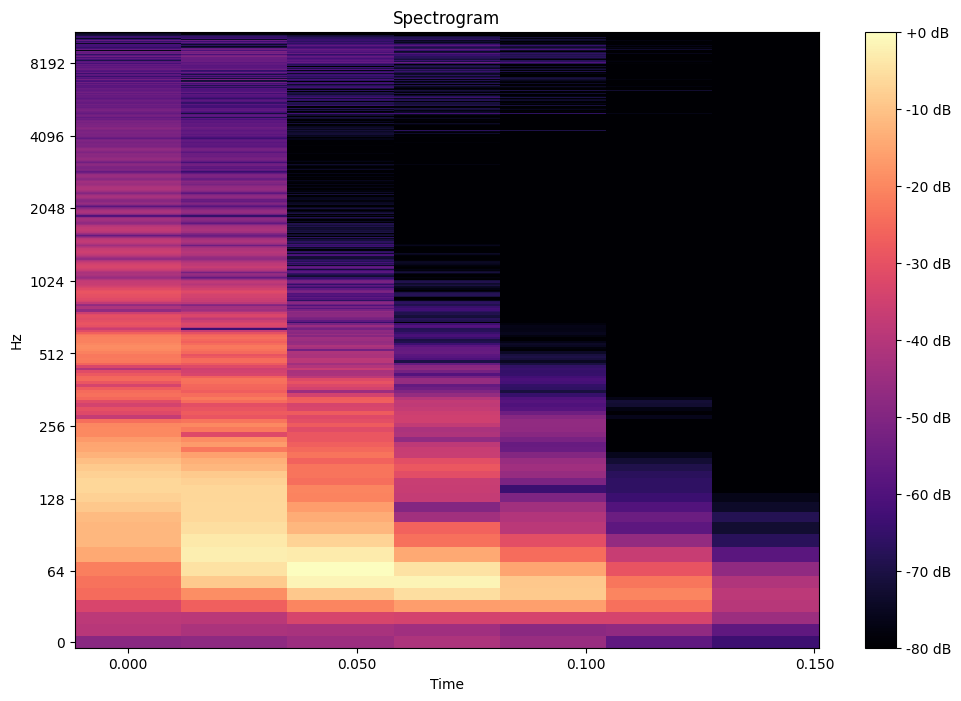

In [6]:
draw_spectrogram("sounds/4 - ZENITH - Drum One Shots/Cymatics - Kick (Wharf).wav")

In [12]:
ipd.Audio(os.path.join(BASE_FOLDER, HAT_FILE))

In [13]:
kick_path = os.path.join(BASE_FOLDER, KICK_FILE)

signal, sr = librosa.load(kick_path)

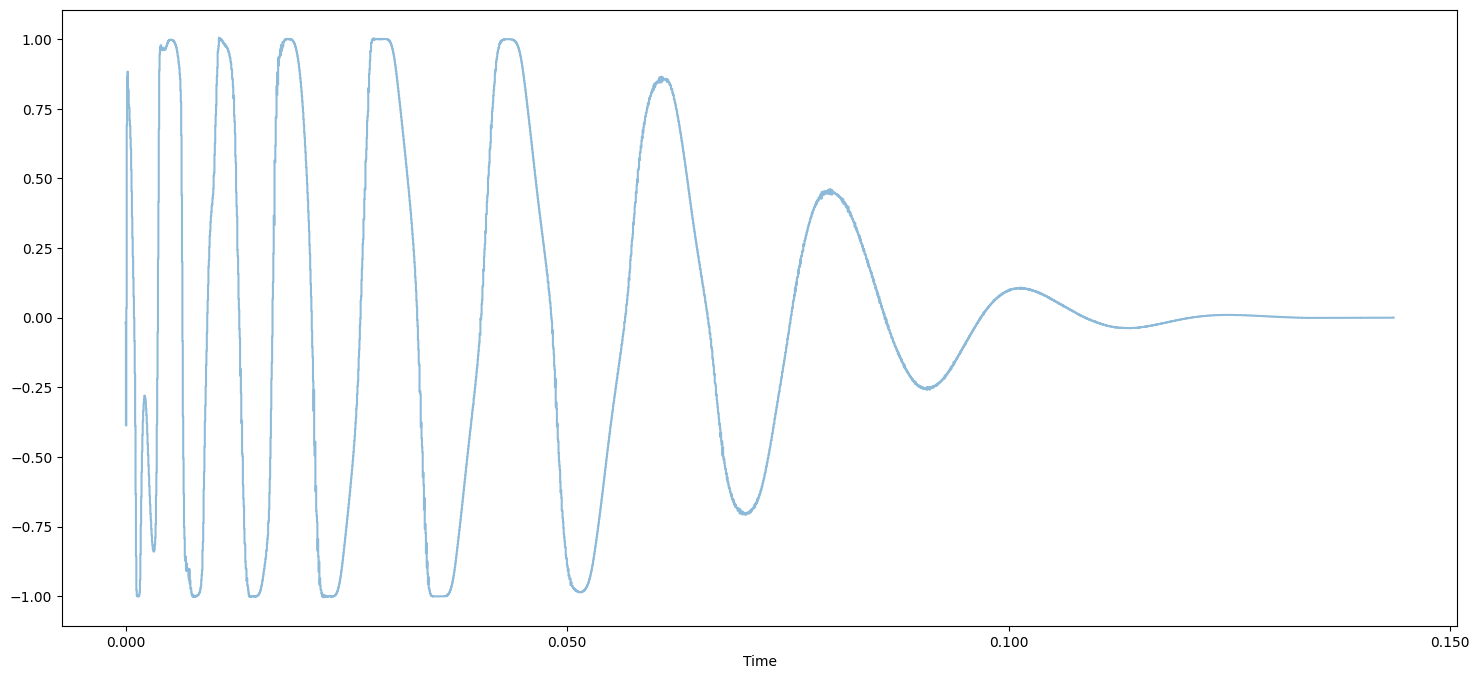

In [17]:
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [26]:
ipd.Audio(os.path.join(BASE_FOLDER, KICK_FILE))

In [32]:
# make fft
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

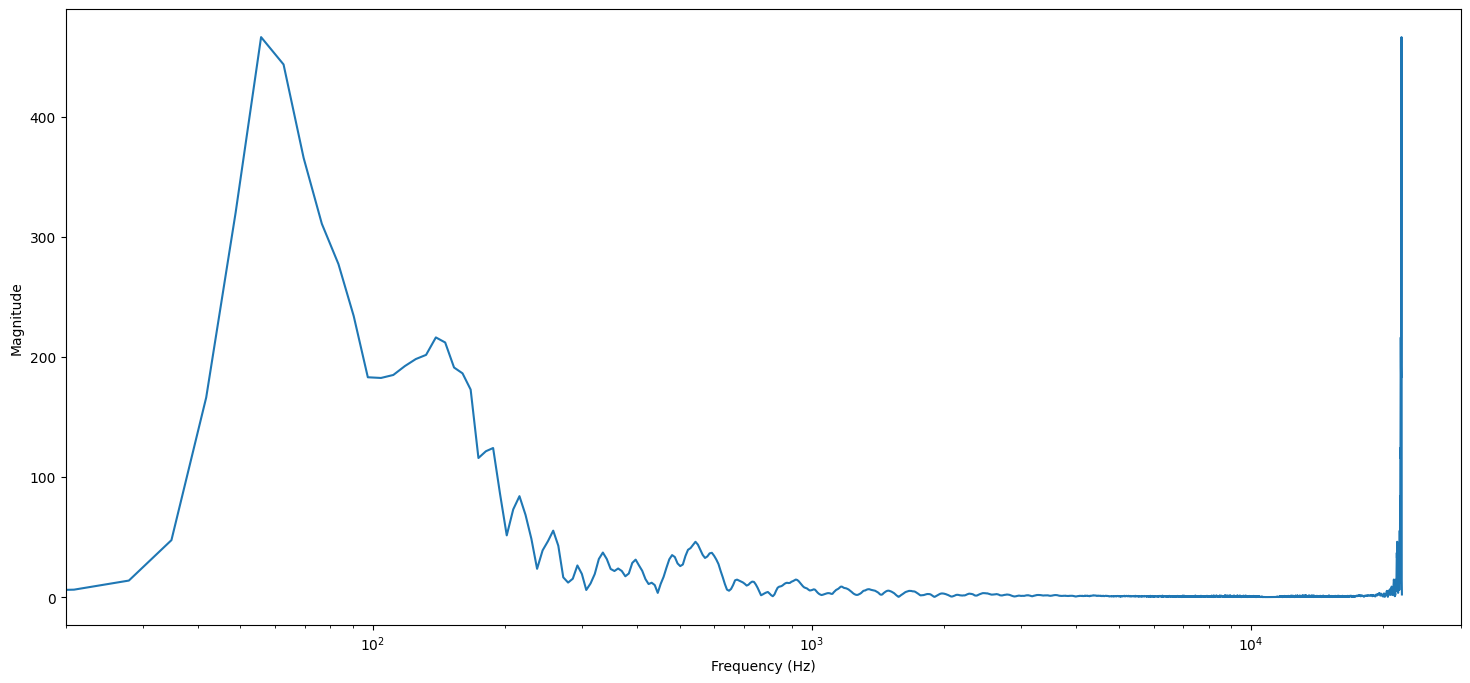

In [33]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency, magnitude)  # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xscale("log")  # Set x-axis to log scale
plt.xlim(20, 30000)  # Set the x-axis limits from 20 Hz to 20 kHz
plt.show()

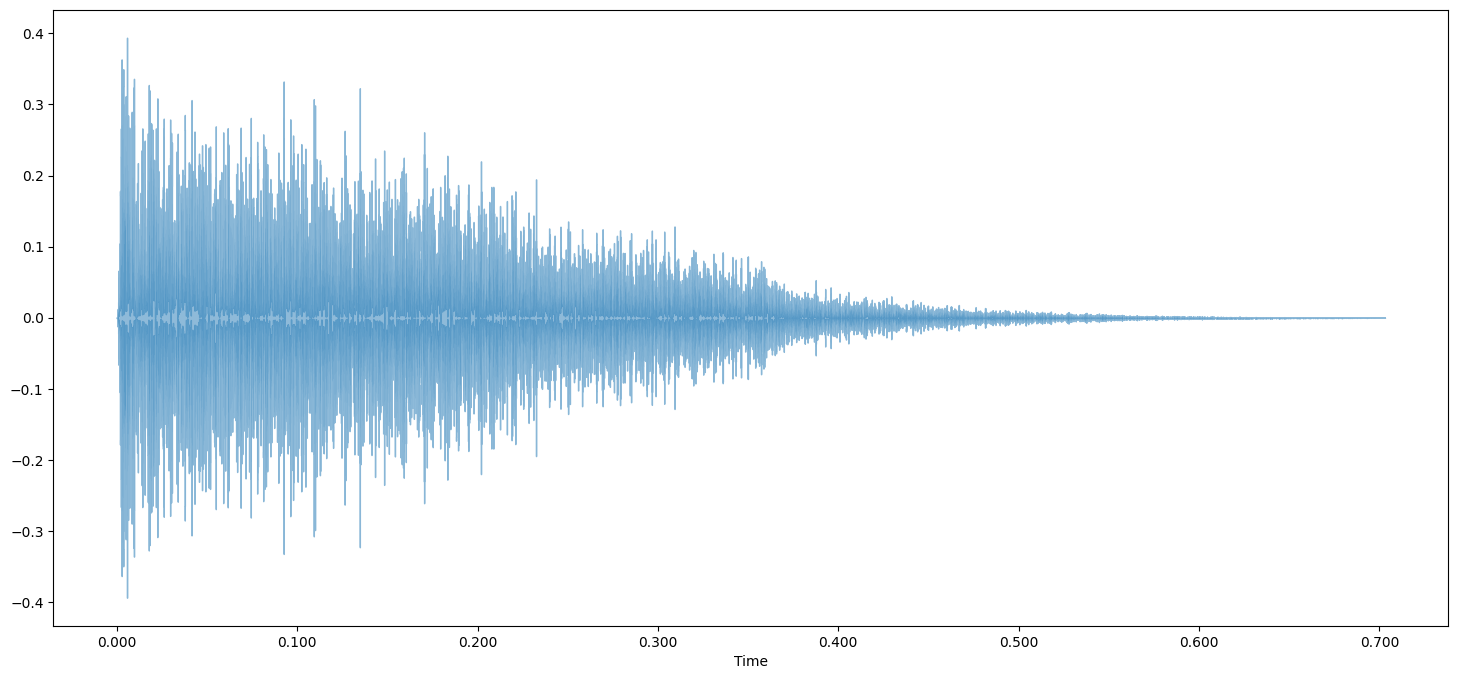

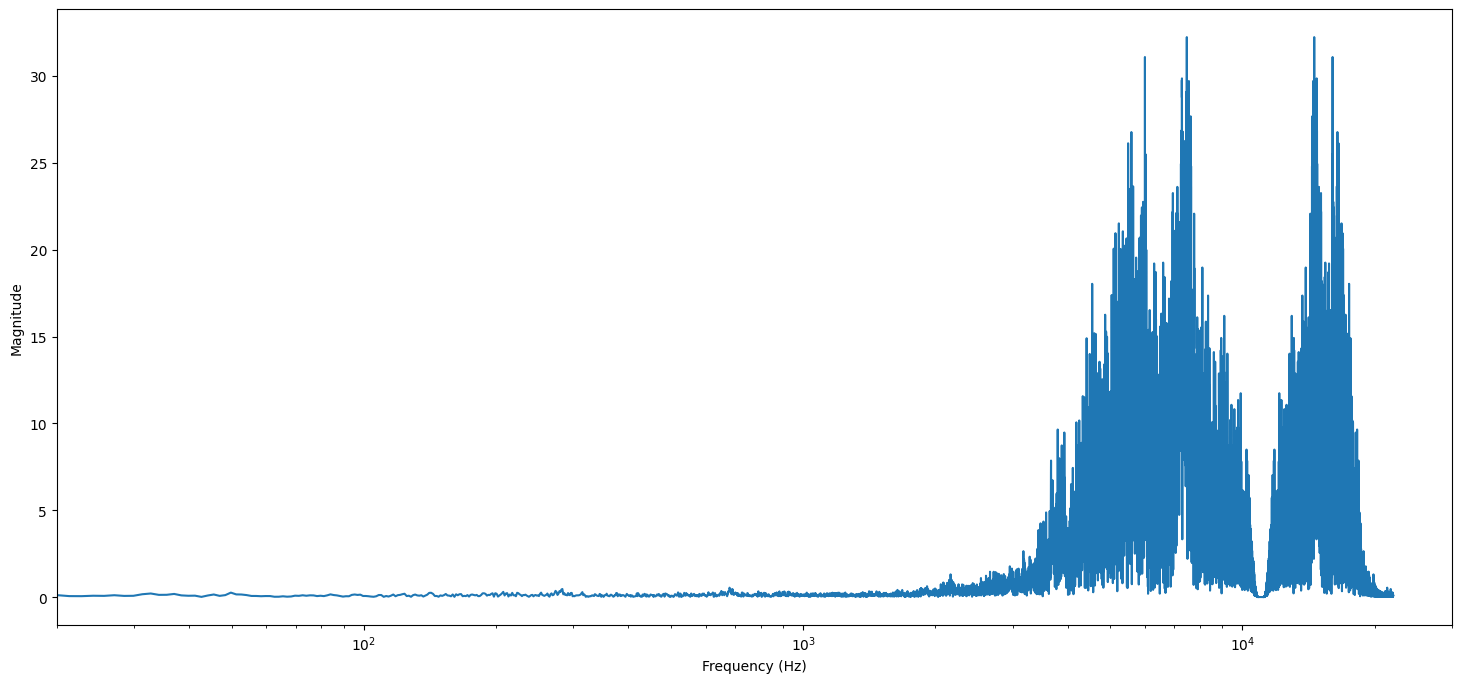

In [34]:
# hat path
hat_path = os.path.join(BASE_FOLDER, HAT_FILE)

# load hat signal
hat_signal, sr = librosa.load(hat_path)

plt.figure(figsize=(18, 8))
librosa.display.waveshow(hat_signal, sr=sr, alpha=0.5)
plt.show()

# make fft
# derive spectrum using FT
ft = sp.fft.fft(hat_signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency, magnitude)  # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xscale('log')  # Set x-axis to log scale
plt.xlim(20, 30000)  # Set the x-axis limits from 20 Hz to 20 kHz
plt.show()

# make a